In [418]:
# SUMMARY:
# Analyze sonar data to classify an object as either a mine or a rock using three different classification 
#   algorithms: Logistic Regression, K-Nearest Neightbor, and Support Vector Machine. Evaluate each algorithm using 
#   accuracy and generate confusion matrices. 

In [419]:
# import packages
import os  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as seab


In [420]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

In [421]:
# setup for multiple outputs from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [422]:
# setting working directory
os.chdir("/media/ijmg/SSD_FOUR_TB/ACADEMICS_101/MY_PROJECTS/Unpack Spot/Sonar/")

In [423]:
# import data 
# use panda package "pd" and function read_csv to read the data in & save it as df 
rock_mine_df = pd.read_csv("sonar_all_data.csv", header=None)

In [424]:
rock_mine_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [425]:
rock_mine_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [426]:
# dataframe descriptive statistics
rock_mine_df.describe()
rock_mine_df.shape

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


(208, 61)

In [427]:
# view class column with 'M' = Mine' and 'R' = 'Rock'
rock_mine_df.iloc[:,60]

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [428]:
# replace character values in class column holding R (Rock) and M (Mine) with numeric categories variable
# 1 = 'M' = Mine' '0 = 'R' = 'Rock' 
for i in range(0,len(rock_mine_df)):
    if   (rock_mine_df.iloc[i, 60] == 'R'):
        rock_mine_df.iloc[i, 60] = 0
    elif (rock_mine_df.iloc[i, 60] == 'M'):
        rock_mine_df.iloc[i, 60] = 1
    

In [429]:
# verify dummy variables 0 = 'Rock', 1 = 'Mine' 
rock_mine_df.iloc[:,60]

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: object

In [430]:
# isolate input sonar values
input_data = rock_mine_df.iloc[:, 0:59]
input_data.head()
input_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0241,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061


In [431]:
# isolate output classification vector to verify dummy variable conversion
class_data = pd.DataFrame(rock_mine_df.iloc[:, 60])
class_data.head()
class_data.tail()

,60
0,0
1,0
2,0
3,0
4,0


,60
203,1
204,1
205,1
206,1
207,1


In [432]:
# break up data into 25% test data and 75% training data
x_input_train, x_input_test, y_output_train, y_output_test = train_test_split(input_data, class_data, test_size=0.25, train_size=0.75, random_state=123 )
training_inputs = x_input_train.astype('float')
training_outputs = y_output_train.astype('int')
test_inputs = x_input_test.astype('float')
test_outputs = y_output_test.astype('int')


In [433]:
# verify shape of training data inputs
training_inputs.shape
training_inputs.head()

(156, 59)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
104,0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,...,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0061,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0142,0.0281,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017
24,0.0293,0.0644,0.0390,0.0173,0.0476,0.0816,0.0993,0.0315,0.0736,0.0860,...,0.0133,0.0170,0.0035,0.0052,0.0083,0.0078,0.0075,0.0105,0.0160,0.0095
197,0.0366,0.0421,0.0504,0.0250,0.0596,0.0252,0.0958,0.0991,0.1419,0.1847,...,0.0194,0.0166,0.0132,0.0027,0.0022,0.0059,0.0016,0.0025,0.0017,0.0027


In [434]:
# verify shape of training data outputs
training_outputs.shape
training_outputs.head()

(156, 1)

,60
104,1
100,1
196,1
24,0
197,1


In [435]:
# verify shape of test data inputs
test_inputs.shape
test_inputs.head()

(52, 59)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
178,0.0197,0.0394,0.0384,0.0076,0.0251,0.0629,0.0747,0.0578,0.1357,0.1695,...,0.0057,0.0091,0.0134,0.0097,0.0042,0.0058,0.0072,0.0041,0.0045,0.0047
80,0.0229,0.0369,0.0040,0.0375,0.0455,0.1452,0.2211,0.1188,0.0750,0.1631,...,0.0240,0.0115,0.0064,0.0022,0.0122,0.0151,0.0056,0.0026,0.0029,0.0104
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0199,0.0208,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0050,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053
165,0.0221,0.0065,0.0164,0.0487,0.0519,0.0849,0.0812,0.1833,0.2228,0.1810,...,0.0216,0.0167,0.0089,0.0051,0.0015,0.0075,0.0058,0.0016,0.0070,0.0074


In [436]:
# verify shape of test data outputs
test_outputs.shape
test_outputs.head()

(52, 1)

,60
178,1
80,0
137,1
179,1
165,1


In [437]:
###############################################################################################################
# LOGISTIC MODEL USING  rock_mine_df
###############################################################################################################
model_logit = LogisticRegression(solver='liblinear', random_state=0)
# fit or train logistic classification model using all input sonar training data
model_logit.fit(training_inputs, training_outputs)
# use trained model to predict output values using test input
predicted_outputs = model_logit.predict(test_inputs).astype('int')
predicted_outputs.shape

LogisticRegression(random_state=0, solver='liblinear')

(52,)

In [438]:
# basic confusion matrix
confus_matrix_logit = confusion_matrix(test_outputs, predicted_outputs)
confus_matrix_logit

array([[17,  6],
       [ 5, 24]])

<AxesSubplot: >

Text(0.5, 1.1, 'Logistic Regression Sonar Object Classification Confusion Matrix')

Text(50.722222222222214, 0.5, 'Actual Sonar Object')

Text(0.5, 23.52222222222222, 'Predicted Sonar Object')

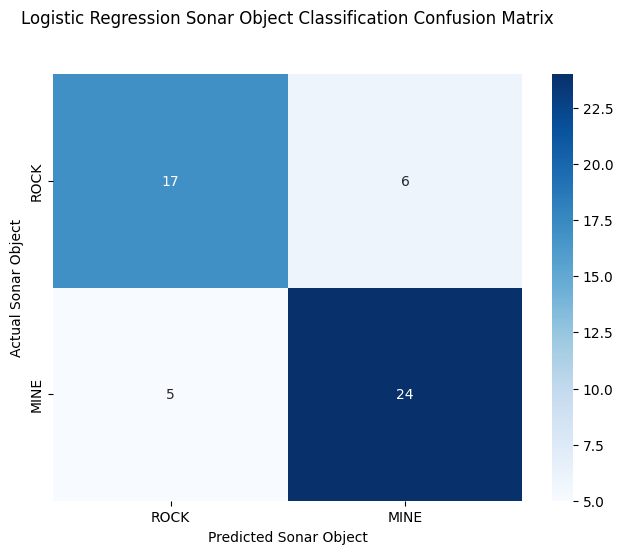

In [439]:
# detailed logistic confusion matrix
categories = ['ROCK','MINE']
seab.heatmap(confus_matrix_logit, annot=True, xticklabels = categories, 
             yticklabels = categories, cmap='Blues')
plt.tight_layout()
plt.title('Logistic Regression Sonar Object Classification Confusion Matrix', y=1.1)
plt.ylabel('Actual Sonar Object')
plt.xlabel('Predicted Sonar Object')

In [440]:
logistic_model_accuracy = round(metrics.accuracy_score(expected_outputs, predicted_outputs), 4)
print("Logistic Model Accuracy:\n", logistic_model_accuracy)


Logistic Model Accuracy:
 0.7885


In [441]:
###############################################################################################################
# KNN MODELS (k = 3, 5, 7, 10, 20) USING  rock_mine_df
###############################################################################################################
# CONFUSION MATRIX SHOWN FOR MODEL WITH LOWEST RMSE USING test_inputs DATA SET
###############################################################################################################

In [442]:
def find_best_knn_model (knn_values_to_check, training_input_data, training_output_data,
                        test_input_data, test_output_data):
    # declare array lists to hold needed output rmse values
    rmse_values = []
    rmse_value_labels = []
    # for loop to check various knn k values
    for x in range (0, len(knn_values_to_check)):
        # define kNN model for given k value
        knn_model = KNeighborsRegressor(n_neighbors = knn_values_to_check[x])
        # train kNN model for given k value using training data 
        knn_model.fit(training_input_data, training_output_data)
        # make predictions using given k value knn model
        test_output_predictions = knn_model.predict(test_input_data)
        # determine rmse values for given k value knn model
        mse_test = mean_squared_error(test_output_data, test_output_predictions)
        rmse_test = sqrt(mse_test)
        # store rmse value
        rmse_values.append(round(rmse_test, 4))
        # store rmse value label
        rmse_value_labels.append('k={}'.format(knn_values_to_check[x]))
    return rmse_values, rmse_value_labels 

In [443]:
knn_values = [1, 2, 3, 5, 7, 10, 20]
rmse_values, rmse_value_labels = find_best_knn_model (knn_values, training_inputs, 
                                            training_outputs, test_inputs, test_outputs)

Text(0.5, 1.0, 'KNN MODEL RMSE VALUES')

Text(0.5, 0, 'KNN MODEL')

Text(0, 0.5, 'RMSE')

Text(30, 0, '0.4160')

Text(30, 0, '0.3922')

Text(30, 0, '0.3551')

Text(30, 0, '0.4455')

Text(30, 0, '0.4621')

Text(30, 0, '0.4547')

Text(30, 0, '0.4485')

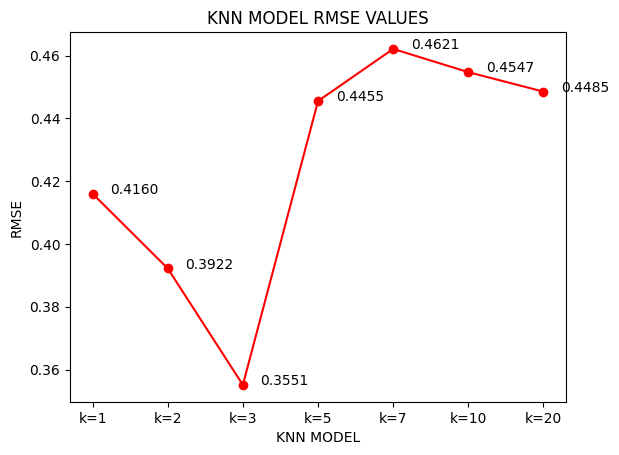

In [444]:
# plot rmse values for various k values to determine best knn model 
x = rmse_value_labels
y = rmse_values
plt.title("KNN MODEL RMSE VALUES")
plt.xlabel("KNN MODEL")
plt.ylabel("RMSE")
plt.plot(x, y, color="red", marker="o", label="Array elements")
# point labels
for x,y in zip(x,y):
    point_labels = "{:.4f}".format(y)
    plt.annotate(point_labels, # this is the text
                 (x,y), # these are the coordinates to position the point_labels
                 textcoords="offset points", # how to position the point_labels
                 xytext=(30,0), # distance from text to point_labels (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [445]:
# Based upon the above k=3 is the best knn model with lowest rsme value of 0.3551
# Rebuild best KNN model (k=3) and determine test output data for confusion matrix  
# Define kNN model for given k value of 3
knn_model = KNeighborsRegressor(n_neighbors = 3)
# train kNN model for given k value using training data 
knn_model.fit(training_inputs, training_outputs)
# make predictions using given k value knn model
knn_test_output_predictions = knn_model.predict(test_inputs)
# set knn output threshold of 0.5
for x in range(len(knn_test_output_predictions)):
    knn_test_output_predictions[x] = 1 if knn_test_output_predictions[x] > 0.5 else 0
# confusion matrix for best model
confus_matrix_knn_best = confusion_matrix(test_outputs, knn_test_output_predictions)
confus_matrix_knn_best


KNeighborsRegressor(n_neighbors=3)

array([[18,  5],
       [ 3, 26]])

<AxesSubplot: >

Text(0.5, 1.1, 'KNN Sonar Object Classification Confusion Matrix')

Text(50.722222222222214, 0.5, 'Actual Sonar Object')

Text(0.5, 23.52222222222222, 'Predicted Sonar Object')

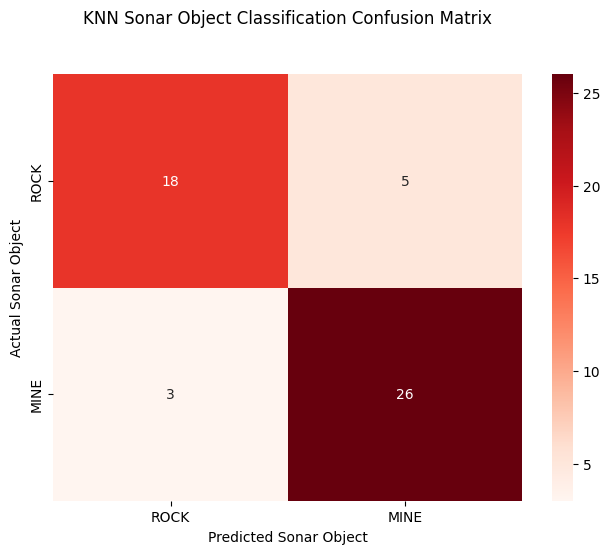

In [446]:
# detailed knn confusion matrix
classes = ['ROCK','MINE']
seab.heatmap(confus_matrix_knn_best, annot=True, xticklabels = classes, 
             yticklabels = classes, cmap='Reds')
plt.tight_layout()
plt.title('KNN Sonar Object Classification Confusion Matrix', y=1.1)
plt.ylabel('Actual Sonar Object')
plt.xlabel('Predicted Sonar Object')


In [447]:
knn_model_accuracy = round(metrics.accuracy_score(expected_outputs, knn_test_output_predictions), 4)
print("Logistic Model Accuracy:\n", knn_model_accuracy)

Logistic Model Accuracy:
 0.8462


In [448]:
###############################################################################################################
# SVM MODEL USING  rock_mine_df
###############################################################################################################
svc_model = SVC(kernel='linear', random_state = 10)
svc_model.fit(training_inputs, training_outputs)
# make predictions
svm_test_output_predictions = svc_model.predict(test_inputs)

SVC(kernel='linear', random_state=10)

<AxesSubplot: >

Text(0.5, 1.1, 'SVM Sonar Object Classification Confusion Matrix')

Text(50.722222222222214, 0.5, 'Actual Sonar Object')

Text(0.5, 23.52222222222222, 'Predicted Sonar Object')

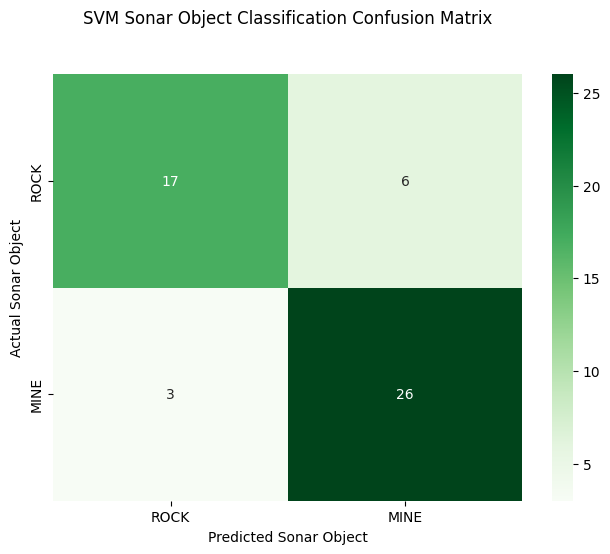

In [449]:
# svm confusion matrix
confus_matrix_svm = confusion_matrix(test_outputs, svm_test_output_predictions)
classes = ['ROCK','MINE']
labels = np.asarray(labels).reshape(2,2)
seab.heatmap(confus_matrix_svm, annot=True, xticklabels = classes, 
             yticklabels = classes, cmap='Greens')
plt.tight_layout()
plt.title('SVM Sonar Object Classification Confusion Matrix', y=1.1)
plt.ylabel('Actual Sonar Object')
plt.xlabel('Predicted Sonar Object')

In [450]:
svm_model_accuracy = round(metrics.accuracy_score(expected_outputs, svm_test_output_predictions), 4)
print("Logistic Model Accuracy:\n", svm_model_accuracy)

Logistic Model Accuracy:
 0.8269


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'CLASSIFICATION MODEL ACCURACIES')

Text(0.5, 0, 'MODEL')

Text(0, 0.5, 'ACCURACY')

Text(0, 0.7885, '0.7885')

Text(1, 0.8462, '0.8462')

Text(2, 0.8269, '0.8269')

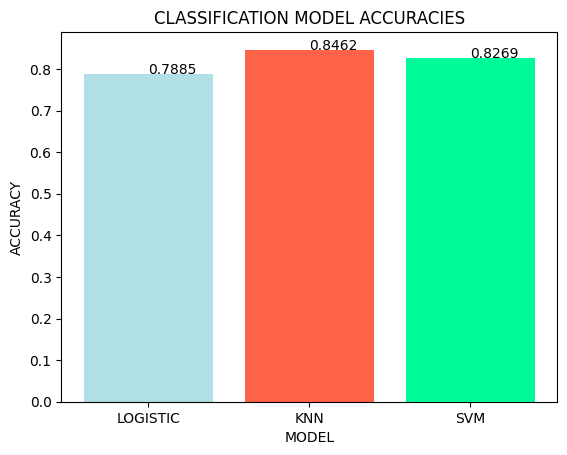

In [451]:
accuracies = [ logistic_model_accuracy, knn_model_accuracy, svm_model_accuracy]
models = ['LOGISTIC', 'KNN', 'SVM']
hex_tomato_color = "#FF6347"
rgb_spring_green_color = (0/255, 250/255, 154/255)
colors = ['powderblue', hex_tomato_color, rgb_spring_green_color]
plt.bar(models, accuracies, color = colors )
plt.title("CLASSIFICATION MODEL ACCURACIES")
plt.xlabel("MODEL")
plt.ylabel("ACCURACY")
for i in range(len(models)):
        plt.text(i,accuracies[i],accuracies[i])

In [452]:
# SUMMARY: For this small sonar datset, the best model for classifying mines versus rocks is the knn model 
#   (with k = 3 ) with an accuracy of 0.8462